In [3]:
import pandas as pd
import networkx as nx
from community import community_louvain
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
from typing import Dict, Tuple

filename: str = "생활이동_행정동_2023.03_14시.csv"
base_path: str = r"C:\Users\kctco\Documents\Code\seoul-communitydetection\data"
file_path: str = os.path.join(base_path, filename)

if not os.path.exists(file_path):
    raise FileNotFoundError(f"The file {file_path} does not exist.")

data: pd.DataFrame = pd.read_csv(file_path, encoding="EUC-KR")
data['이동인구(합)'] = pd.to_numeric(data['이동인구(합)'].replace("*", pd.NA), errors='coerce')


edges: pd.DataFrame = data[["출발 행정동 코드", "도착 행정동 코드", "이동인구(합)"]]

G = nx.Graph()

for index, row in tqdm(edges.iterrows(), total=edges.shape[0], desc="Creating Graph"):
    if pd.notna(row["이동인구(합)"]):
        G.add_edge(
            row["출발 행정동 코드"], row["도착 행정동 코드"], weight=row["이동인구(합)"]
        )


Creating Graph:   1%|          | 58394/8011337 [00:01<03:01, 43883.63it/s]


KeyboardInterrupt: 

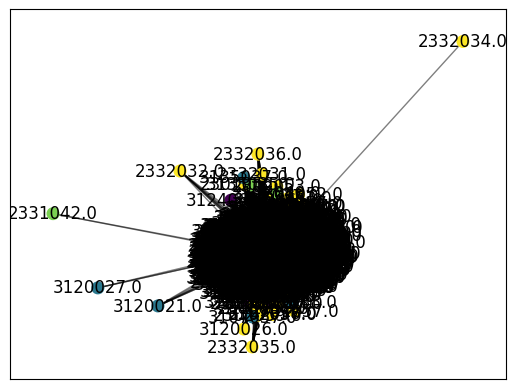

Community detection result: {1101053.0: 0, 1101055.0: 4, 1101056.0: 2, 1101057.0: 0, 1101058.0: 2, 1101060.0: 0, 1101072.0: 3, 1101073.0: 1, 1102054.0: 5, 1102055.0: 5, 1102057.0: 5, 1102058.0: 4, 1102059.0: 5, 1104057.0: 4, 1104058.0: 4, 1104059.0: 4, 1104065.0: 4, 1104066.0: 4, 1104067.0: 4, 1104068.0: 4, 1104071.0: 4, 1104073.0: 4, 1105053.0: 5, 1105054.0: 4, 1105055.0: 4, 1105057.0: 4, 1105059.0: 4, 1105060.0: 4, 1105061.0: 4, 1105062.0: 4, 1105063.0: 4, 1105065.0: 4, 1105066.0: 4, 1105067.0: 4, 1106071.0: 4, 1106072.0: 4, 1106073.0: 4, 1106080.0: 4, 1106081.0: 2, 1111066.0: 4, 1111076.0: 4, 1111077.0: 4, 1111078.0: 4, 1111079.0: 4, 1112051.0: 2, 1101061.0: 3, 1101063.0: 5, 1101064.0: 5, 1101067.0: 2, 1101069.0: 4, 1101070.0: 4, 1101071.0: 2, 1102052.0: 5, 1102060.0: 5, 1102065.0: 4, 1102067.0: 4, 1102068.0: 4, 1102069.0: 4, 1102070.0: 4, 1102071.0: 4, 1103051.0: 2, 1103052.0: 2, 1103053.0: 0, 1103057.0: 2, 1103058.0: 2, 1103063.0: 5, 1103064.0: 0, 1103065.0: 4, 1103066.0: 2, 11030

In [ ]:
partition: Dict[int, int] = community_louvain.best_partition(G, weight="weight")

pos: Dict[int, Tuple[float, float]] = nx.spring_layout(G)

cmap = plt.get_cmap("viridis")
colors: list = [cmap(i) for i in partition.values()]

nx.draw_networkx_nodes(
    G, pos, node_size=70, cmap=cmap, node_color=list(partition.values())
)
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos)
plt.show()

with open("community_results.txt", "w") as file:
    for node, comm in partition.items():
        file.write(f"{node} : {comm}\n")

print("Community detection result:", partition)

In [5]:
from collections import defaultdict

def load_partition(file_path: str):
    partition = {}
    with open(file_path, 'r') as file:
        for line in file:
            parts = line.strip().split(' : ')
            if len(parts) == 2:
                key = float(parts[0])
                value = int(parts[1])
                partition[key] = value

    return partition

file_path = 'community_results.txt'

partition = load_partition(file_path)

community_dict = defaultdict(list)
for key, value in partition.items():
    community_dict[value].append(key)

for community, nodes in community_dict.items():
    print(f"Community {community}: {nodes}")

Community 0: [1101053.0, 1101057.0, 1101060.0, 1103053.0, 1103064.0, 3101265.0, 3101464.0, 3102160.0, 3109178.0, 3116062.0, 3117053.0, 3117055.0, 3119152.0, 3119154.0, 3123053.0, 3124060.0, 3124061.0, 1122057.0, 1122059.0, 1122067.0, 1123058.0, 1123059.0, 1123063.0, 1123067.0, 1123072.0, 1123075.0, 1123077.0, 1123078.0, 1123079.0, 1123080.0, 1124052.0, 3101355.0, 3119255.0, 1122066.0, 1122068.0, 1123065.0, 1124069.0, 2301063.0, 2304063.0, 3109273.0, 1123060.0, 3101260.0, 3102165.0, 3119357.0, 3120011.0, 3124054.0, 1123071.0, 3122031.0, 3102152.0, 3119254.0, 3102157.0, 3102354.0, 3107062.0, 3114051.0, 3116052.0, 3119260.0, 3119359.0, 3124055.0, 3124064.0, 3101161.0, 3101159.0, 3117051.0, 3102260.0, 3107058.0, 3122052.0, 3101356.0, 3101451.0, 3102158.0, 3101454.0, 3122042.0, 3101354.0, 3122035.0, 3122051.0, 3107060.0, 3128038.0, 3102255.0, 3121038.0, 3124067.0, 3122033.0]
Community 4: [1101055.0, 1102058.0, 1104057.0, 1104058.0, 1104059.0, 1104065.0, 1104066.0, 1104067.0, 1104068.0, 1104

In [12]:
import pandas as pd

def load_partition(file_path: str) -> dict:
    partition = {}
    with open(file_path, 'r') as file:
        for line in file:
            parts = line.strip().split(' : ')
            if len(parts) == 2:
                key = float(parts[0])
                value = int(parts[1])
                partition[key] = value
    return partition

partition_file_path = 'community_results.txt'
excel_file_path = 'data/서울생활이동데이터_행정동코드_20210907.xlsx'

partition = load_partition(partition_file_path)

df = pd.read_excel(excel_file_path)
community_names = {}

for key, community in partition.items():
    match_row = df[df['읍면동'] == key]
    if not match_row.empty:
        name_value = match_row['name'].values[0]
        if community in community_names:
            community_names[community].append(name_value)
        else:
            community_names[community] = [name_value]

for community, names in community_names.items():
    print(f"Community {community}: {names}")


Community 0: ['사직동', '무악동', '가회동', '남영동', '이촌2동', '금곡동', '영통1동', '단대동', '해양동', '대야동', '오전동', '내손2동', '역삼동', '동부동', '사우동', '동탄2동', '동탄1동', '반포1동', '반포3동', '양재2동', '삼성1동', '삼성2동', '대치4동', '도곡2동', '일원본동', '수서동', '압구정동', '청담동', '대치2동', '개포2동', '풍납2동', '우만2동', '서농동', '양재1동', '내곡동', '역삼2동', '문정2동', '용유동', '송도2동', '호수동', '대치1동', '권선1동', '고등동', '상현1동', '문산읍', '병점2동', '개포4동', '보개면', '신흥2동', '기흥동', '태평4동', '수내2동', '비전1동', '중앙동', '군포2동', '상하동', '성복동', '반월동', '동탄4동', '연무동', '송죽동', '고천동', '하대원동', '신장2동', '안성2동', '인계동', '매탄1동', '수진1동', '매탄4동', '고삼면', '우만1동', '대덕면', '안성1동', '원평동', '강천면', '은행1동', '율면', '새솔동', '서운면']
Community 4: ['부암동', '장충동', '행당2동', '응봉동', '금호1가동', '성수1가1동', '성수1가2동', '성수2가1동', '성수2가3동', '왕십리도선동', '옥수동', '군자동', '중곡1동', '중곡3동', '능동', '구의1동', '구의2동', '구의3동', '광장동', '자양2동', '자양3동', '자양4동', '회기동', '휘경1동', '휘경2동', '청량리동', '상계2동', '상계3·4동', '상계6·7동', '중계2·3동', '공릉1동', '창신3동', '숭인1동', '신당5동', '황학동', '중림동', '신당동', '다산동', '약수동', '이태원1동', '마장동', '행당1동', '제기동', '전농1동', '답십리2동', '장안1동', '이문1동',

In [ ]:


Todo 
1. 경기도로 줄이기
2. 시군구 단위로 줄이기
3. 생활 이동 데이터 

2023 전체로 했었는데.


